In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('VDT2022_Telco_Customer_Churn_Dataset.csv')
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
raw_data.shape

(7043, 21)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Hãy làm sạch dữ liệu 1 chút
- `SeniorCitizen` sẽ là object vì feature này cho biết khách hàng nào là khách hàng lớn tuổi (>= 62t)
- `TotalCharges` sẽ là float64 thì feature này cho biết tổng doanh thu do 1 khách hàng tạo ra từ trước đến giờ

In [66]:
raw_data['SeniorCitizen'] = raw_data['SeniorCitizen'].astype('object')
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')

In [68]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Có 1 số ít dữ liệu bị thiếu ở feature `TotalCharges` sau khi đã được làm sạch. Hãy tìm hiểu 1 chút

In [70]:
raw_data['TotalCharges'].isna().sum()

11

In [77]:
raw_data[np.isnan(raw_data['TotalCharges'])].head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


Có thể thấy mặc dù thông tin của khách hàng đều có đầy đủ giá trị ở `tenure` và `MonthlyCharges` vì 1 số lý do lại thiếu đi giá trị ở `TotalCharges`. <br>
Chúng ta sẽ dễ dàng điền vào những giá trị trống này bằng cách lấy giá trị ở `tenure` * `MonthlyCharges`

In [78]:
raw_data['TotalCharges'].fillna(raw_data['tenure'] * raw_data['MonthlyCharges'], inplace=True)

In [81]:
raw_data.info()
raw_data.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [79]:
raw_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


- 1 nửa lượng khách hàng đăng kí dịch vụ hơn 29 tháng - hơn 2 năm
- Trung bình doanh thu theo tháng này của công ty rơi vào khoảng `$65`
- Trung bình tổng doanh thu của công ty rơi vào khoảng `$2280`

In [6]:
raw_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Some EDA

No     5174
Yes    1869
Name: Churn, dtype: int64

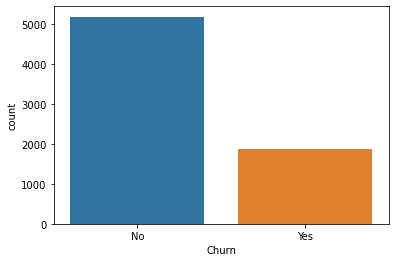

In [20]:
sns.countplot(x='Churn', data=raw_data)

raw_data['Churn'].value_counts()

`26.54%` người rời dịch vụ so với tháng trước

## `gender`

<AxesSubplot:xlabel='gender', ylabel='count'>

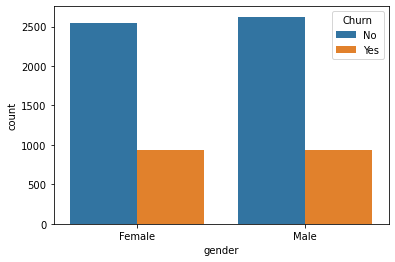

In [135]:
sns.countplot(x='gender', hue='Churn', data=raw_data)

In [92]:
raw_data.groupby('gender')[['MonthlyCharges', 'TotalCharges']].mean()

,MonthlyCharges,TotalCharges
gender,,
Female,65.204243,2279.918062
Male,64.327482,2279.554008


- Giới tính của người đăng kí không làm ảnh hưởng đến việc họ rời dịch vụ hay không 
- Giới tính của người đăng kí không gây ảnh hưởng đến doanh thu của công ty

## `SeniorCitizen`

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

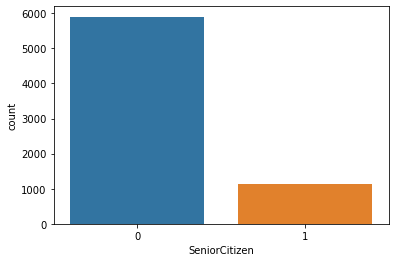

In [13]:
sns.countplot(x='SeniorCitizen', data=raw_data)

raw_data['SeniorCitizen'].value_counts()

Phần lớn những người dùng dịch vụ tháng này đều không phải là Senior Citizen, chiếm `83.79%`

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

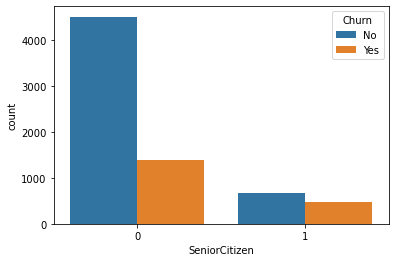

In [134]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=raw_data)

- `23.61%` Non Senior Citizen rời bỏ dịch vụ vào tháng sau 
- `41.68%` Senior Citizen rời bỏ dịch vụ vào tháng sau <br>
<b>Tỉ lệ bỏ dịch vụ của Senior Citizen là rất đáng chú ý</b>

In [101]:
print(raw_data.groupby('SeniorCitizen')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean())
print('\n')
print(raw_data.groupby('SeniorCitizen')[['MonthlyCharges', 'TotalCharges']].sum())

                  tenure  MonthlyCharges  TotalCharges
SeniorCitizen                                         
0              32.192171       61.847441   2177.023801
1              33.295972       79.820359   2810.465193


               MonthlyCharges  TotalCharges
SeniorCitizen                              
0                   364961.75   12846617.45
1                    91154.85    3209551.25


- Doanh thu kiếm được từ những Senior Citizen cao hơn so với những Non Senior Citizen
- Tổng doanh thu của công ty vẫn đến chủ yếu từ những Non Senior Citizen vì họ chiếm `83.79%`

## `Partner`

<AxesSubplot:xlabel='Partner', ylabel='count'>

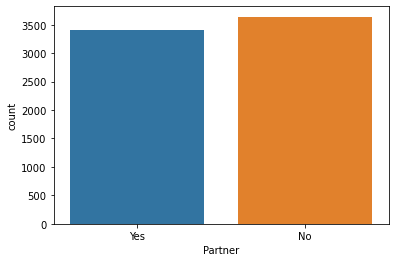

In [26]:
sns.countplot(x='Partner', data=raw_data)

<AxesSubplot:xlabel='Partner', ylabel='count'>

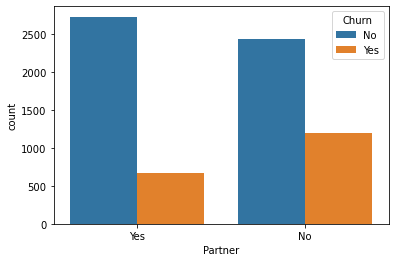

In [133]:
sns.countplot(x='Partner', hue='Churn', data=raw_data)

In [102]:
raw_data.groupby('Partner')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Partner,,,
No,23.357869,61.945001,1584.089810
Yes,42.017637,67.776264,3024.249765


- Tỉ lệ rời dịch vụ của những người không có partner cao hơn những người có partner
- Trung bình doanh thu theo tháng công ty thu được từ những người có partner so với những người không là như nhau
- Nhưng điều đáng chú ý là những người có partner gắn bó với dịch vụ lâu hơn rất nhiều. Vì vậy tổng doanh thu thu được từ những người có partner sẽ cao hơn

## `Dependents`

<AxesSubplot:xlabel='Partner', ylabel='count'>

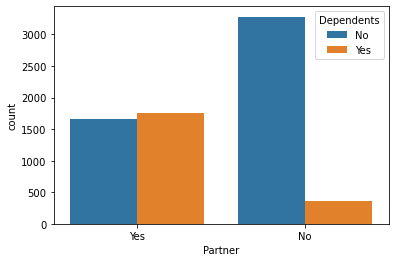

In [87]:
sns.countplot(x='Partner', hue='Dependents', data=raw_data)

Dễ dàng thấy được những người có partner sẽ có nhiều người phụ thuộc (con cái) hơn những độc thân

<AxesSubplot:xlabel='Dependents', ylabel='count'>

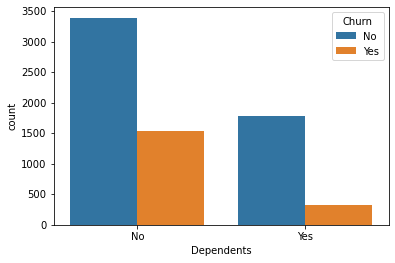

In [131]:
sns.countplot(x='Dependents', hue='Churn', data=raw_data)

Có thể thấy được tỉ lệ rời dịch vụ của những người có người phụ thuộc thấp hơn nhiều so với những người không có người phụ thuộc (`15.45%` vs `31.28%`)

## `tenure`

In [103]:
raw_data.describe()['tenure']

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

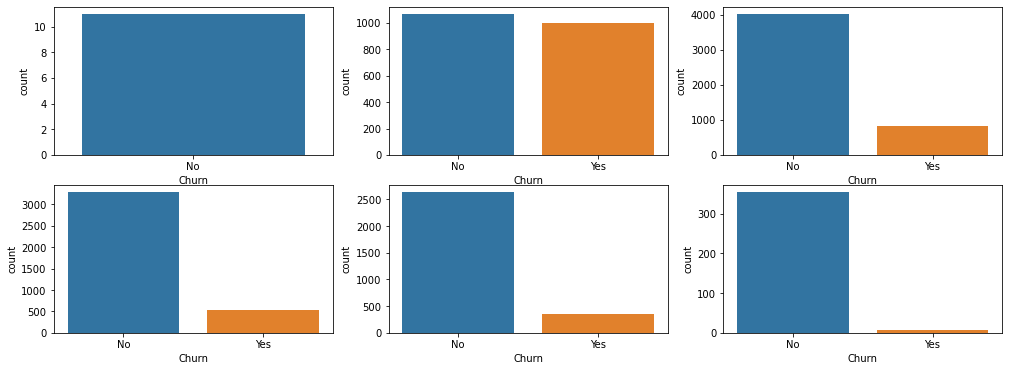

In [55]:
fig, ax = plt.subplots(2, 3, figsize=(17,6))

sns.countplot(x='Churn', data=raw_data[raw_data['tenure'] == 0], ax=ax[0][0])
sns.countplot(x='Churn', data=raw_data[raw_data['tenure'] < 12], ax=ax[0][1])
sns.countplot(x='Churn', data=raw_data[raw_data['tenure'] > 12], ax=ax[0][2])
sns.countplot(x='Churn', data=raw_data[raw_data['tenure'] > 24], ax=ax[1][0])
sns.countplot(x='Churn', data=raw_data[raw_data['tenure'] > 36], ax=ax[1][1])
sns.countplot(x='Churn', data=raw_data[raw_data['tenure'] == 72], ax=ax[1][2])

In [108]:
print(raw_data[raw_data['tenure'] == 0][['MonthlyCharges', 'TotalCharges']].mean())
print(raw_data[raw_data['tenure'] < 12][['MonthlyCharges', 'TotalCharges']].mean())
print(raw_data[raw_data['tenure'] > 12][['MonthlyCharges', 'TotalCharges']].mean())
print(raw_data[raw_data['tenure'] > 24][['MonthlyCharges', 'TotalCharges']].mean())
print(raw_data[raw_data['tenure'] > 36][['MonthlyCharges', 'TotalCharges']].mean())
print(raw_data[raw_data['tenure'] == 72][['MonthlyCharges', 'TotalCharges']].mean())

MonthlyCharges    41.418182
TotalCharges       0.000000
dtype: float64
MonthlyCharges     56.056017
TotalCharges      252.801136
dtype: float64
MonthlyCharges      68.661077
TotalCharges      3181.905868
dtype: float64
MonthlyCharges      70.612314
TotalCharges      3731.079859
dtype: float64
MonthlyCharges      72.008730
TotalCharges      4213.723192
dtype: float64
MonthlyCharges      80.695856
TotalCharges      5812.445028
dtype: float64


- `100%` những người dùng dịch vụ tháng đầu đều đăng kí tiếp vào tháng sau
- Tỉ lệ bỏ dịch vụ của những người đăng kí dưới 1 năm là rất cao (gần `50%`)
- Thời gian đăng kí càng lâu thì tỉ lệ người dùng rời đi vào tháng sau càng giảm mạnh
- Người dùng đăng kí càng lâu thì càng chi nhiều tiền hơn cho dịch vụ 

## `PhoneService`

Yes    6361
No      682
Name: PhoneService, dtype: int64

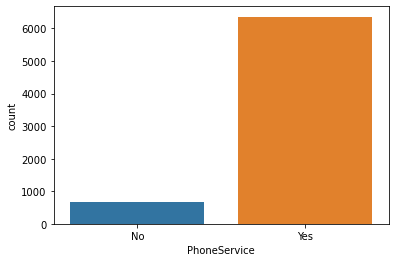

In [116]:
sns.countplot(x='PhoneService', data=raw_data)

raw_data['PhoneService'].value_counts()

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

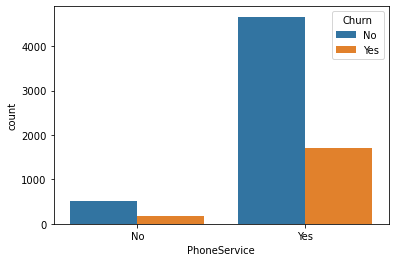

In [129]:
sns.countplot(x='PhoneService', hue='Churn', data=raw_data)

In [110]:
raw_data.groupby('PhoneService')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
PhoneService,,,
No,31.737537,42.028592,1496.033651
Yes,32.439082,67.199041,2363.759432


- `90.32%` người dùng dịch vụ cũng đăng kí PhoneService
- Dễ dàng thấy được trung bình thời gian ở lại dịch vụ là như nhau nhưng những người đăng kí PhoneService mang lại doanh thu cao hơn cho công ty so với những người không đăng kí

## `MultipleLines`

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

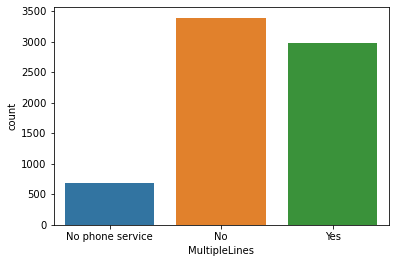

In [122]:
sns.countplot(x='MultipleLines', data=raw_data)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

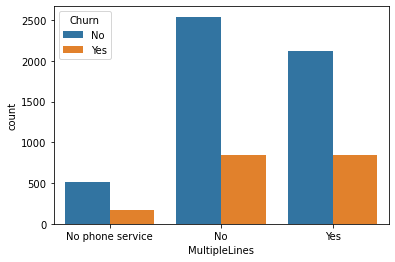

In [128]:
sns.countplot(x='MultipleLines', hue='Churn', data=raw_data)

In [118]:
raw_data.groupby('MultipleLines')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
MultipleLines,,,
No,24.134808,54.195059,1347.842153
No phone service,31.737537,42.028592,1496.033651
Yes,41.914507,82.036974,3522.951481


- `42.18%` người dùng đăng kí MultipleLines, `48.13%` không đăng kí MultipleLines, `9.69%` còn lại không đăng kí PhoneService
- MultipleLines giúp người đăng kí có trải nghiệm dùng dịch vụ tốt hơn vì họ có thời gian đăng kí dịch vụ trung bình lâu hơn nhưng tỉ lệ rời đi tháng sau của họ lại cao hơn (`28.61%` so với `25.04%`(không đăng kí MultipleLines) và `24.93%`(không đăng kí PhoneService))
- Doanh thu kiếm được từ những người đăng kí MultipleLines cũng cao hơn hẳn so với những người đăng kí 2 hình thức còn lại 

## `InternetService`

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

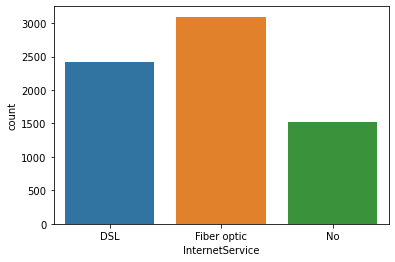

In [126]:
sns.countplot(x='InternetService', data=raw_data)

raw_data['InternetService'].value_counts()

<AxesSubplot:xlabel='InternetService', ylabel='count'>

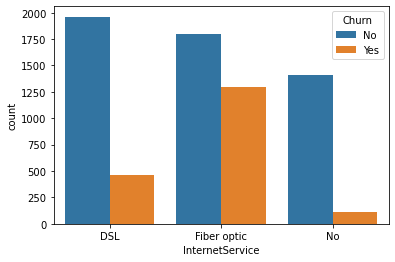

In [127]:
sns.countplot(x='InternetService', hue='Churn', data=raw_data)

In [124]:
raw_data.groupby('InternetService')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
InternetService,,,
DSL,32.821561,58.102169,2115.411338
Fiber optic,32.917959,91.500129,3205.304570
No,30.547182,21.079194,662.604784


- Giá của gói `Fiber optic` khá cao vì doanh thu thu được từ những người đăng kí gói này rất cao. Nhưng giá trị mà gói này mang lại cho người dùng chưa xứng đáng vì họ có tỉ lệ rời đi vào tháng sau rất lớn với `41.89%`
- Ngược lại, doanh thu thu được của công ty từ những người đăng kí gói `DSL` là thấp hơn nhiều nhưng những người dùng gói này khá hài lòng khi sử dụng gói `DSL` vì tỉ lệ rời đi của họ thấp hơn rất nhiều với `18.96%`
- Chỉ khoảng `21.67%` người dùng không đăng kí InternetService và tỉ lệ rời đi vào tháng sau của họ cũng thấp nhất với `7.41%` nhưng doanh thu công ty thu được từ nhóm người này thấp hơn hẳn so với nhóm người đăng kí InternetService

## `OnlineSecurity`

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

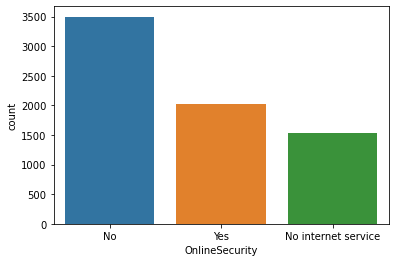

In [136]:
sns.countplot(x='OnlineSecurity', data=raw_data)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

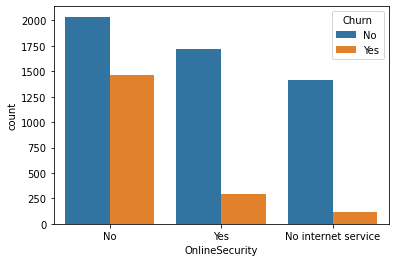

In [137]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=raw_data)